<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/cluster_0910_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

##데이터생성

In [3]:
def plot_data(dataset, position, title):
    X,y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:,0],X[:,1])

In [4]:
np.random.seed(0)
n_samples=1500
random_state=0
noise = 0.05

In [8]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5,noise=noise,random_state=random_state)
moons=datasets.make_moons(n_samples=n_samples,noise=noise,random_state=random_state)
blobs=datasets.make_blobs(n_samples=n_samples,random_state=random_state)
no_structures = np.random.rand(n_samples,2),None

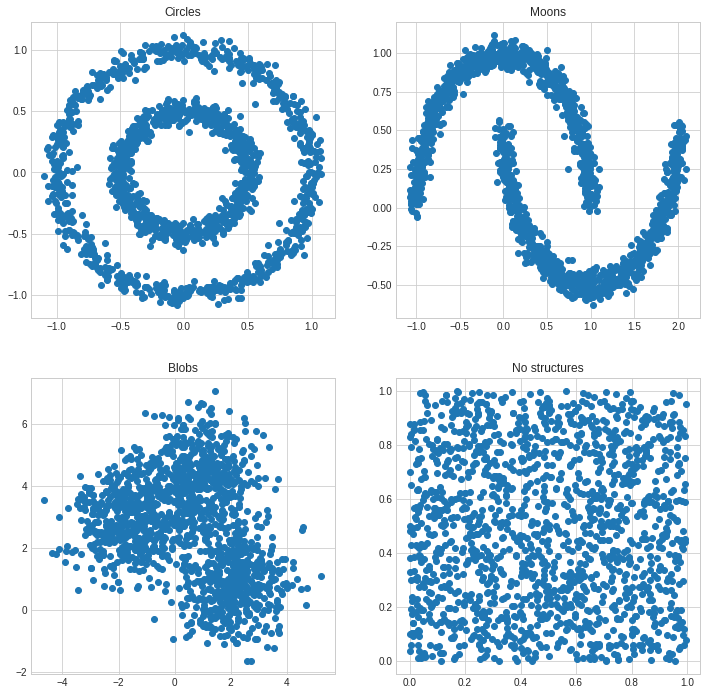

In [16]:
plt.figure(figsize=(12,12))
plot_data(circles,221,'Circles')
plot_data(moons,222,'Moons')
plot_data(blobs,223,'Blobs')
plot_data(no_structures,224,'No structures')

In [45]:
def fit_predict_plot(model, dataset, position, title):
    X,y =dataset 
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels =model.labels_.astype(np.int)
    else:
        labels = model.predict(X)

    colors = np.array(['#30A9DE','#E53A40','#090707','#A593E0','#F6B352','#519D9E','#D81159',
                      '#8CD790','#353866'])
    ax=plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:,0],X[:,1],color=colors[labels])


##K-평균 (K-means)

*   n개의 등분산 그룹으로 군집화
*   제곱합 함수를 최소화 
*   군집화 걔수를 지정 
*   각 군집 C의 평균 ${\mu}_j$를 중심점으로 함 
*   다음 목적함수를 만족하는 중심점을 찾는 것이 목표 
$$\sum_{i=0}^n min_{{\mu}_j \in C} (|| x_i -{\mu}_j ||^2 )$$





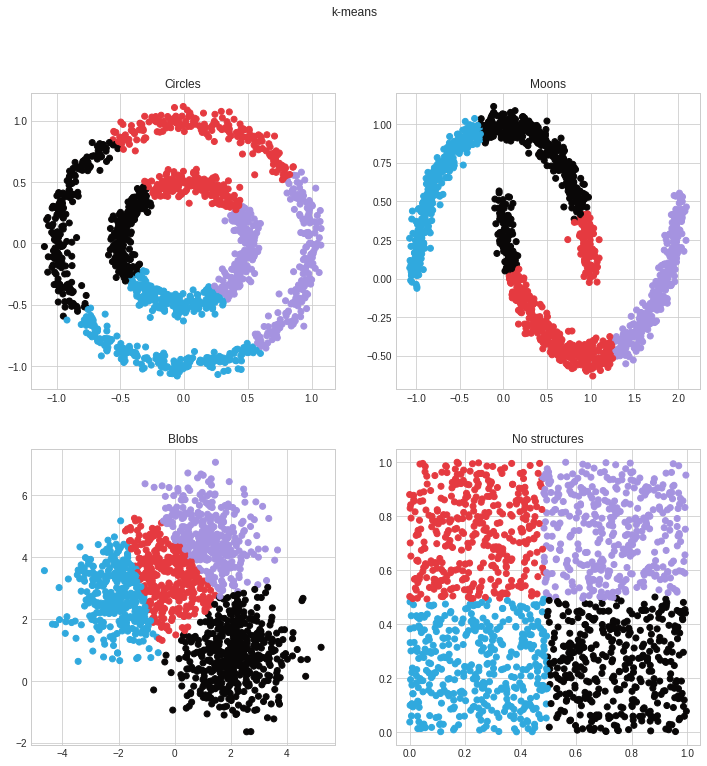

In [31]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('k-means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), circles,221,'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), moons,222,'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs,223,'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures,224,'No structures')

##붓꽃 데이터 군집화 


*   K-means알고리즘을 사용해 붓꽃 데이터를 군집화 한다. 
*   잘 군집화 되어 있다. 



In [32]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()

In [34]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [36]:
idx=np.where(predict==0)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [37]:
idx=np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
idx=np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 미니 배치 K-평균 (Mini Batch K-Means)
*   배치처리를 통해 계산시간을 줄인 K-평균 
*   K-평균과 다른 결과가 나올 수 있음 



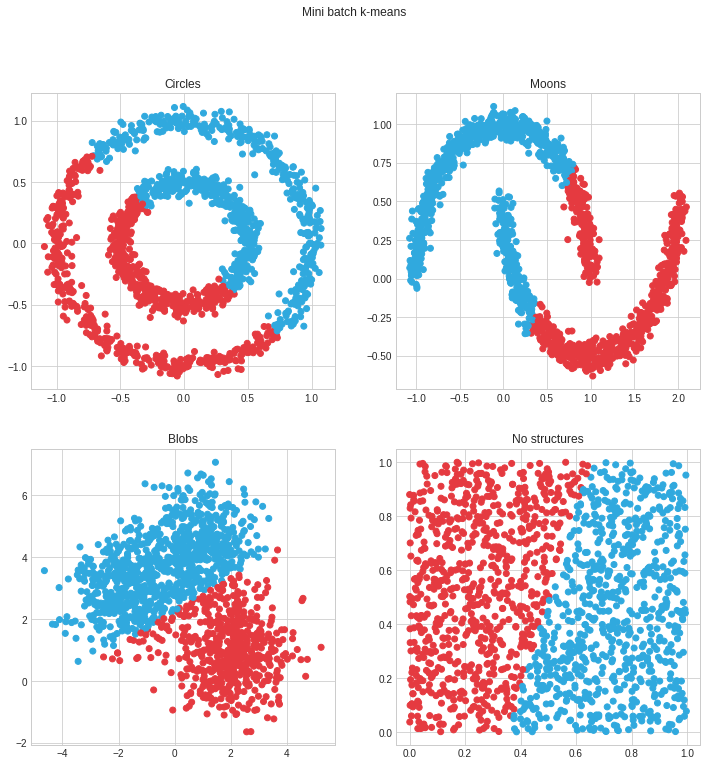

In [39]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Mini batch k-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), circles,221,'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), moons,222,'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), blobs,223,'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), no_structures,224,'No structures')

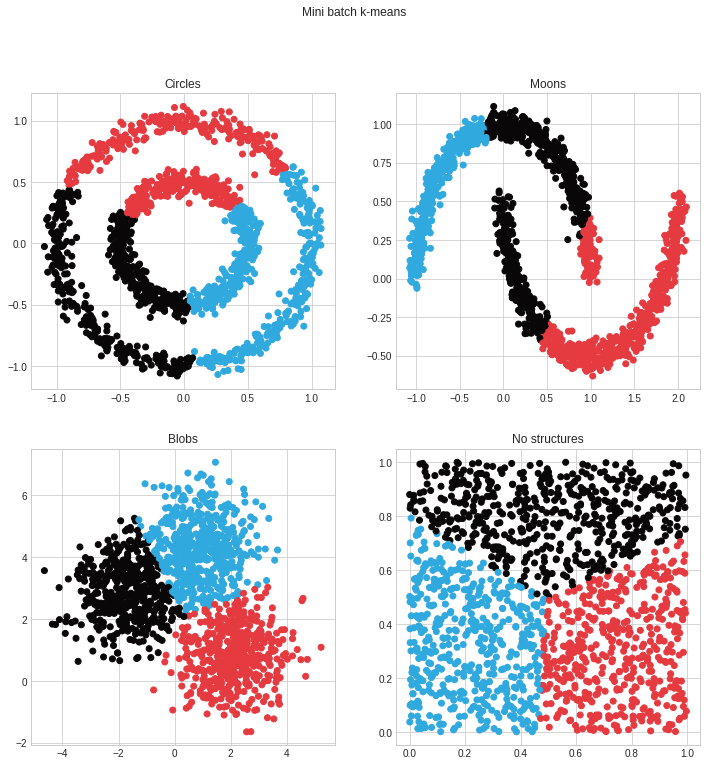

In [40]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Mini batch k-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), circles,221,'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moons,222,'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs,223,'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), no_structures,224,'No structures')

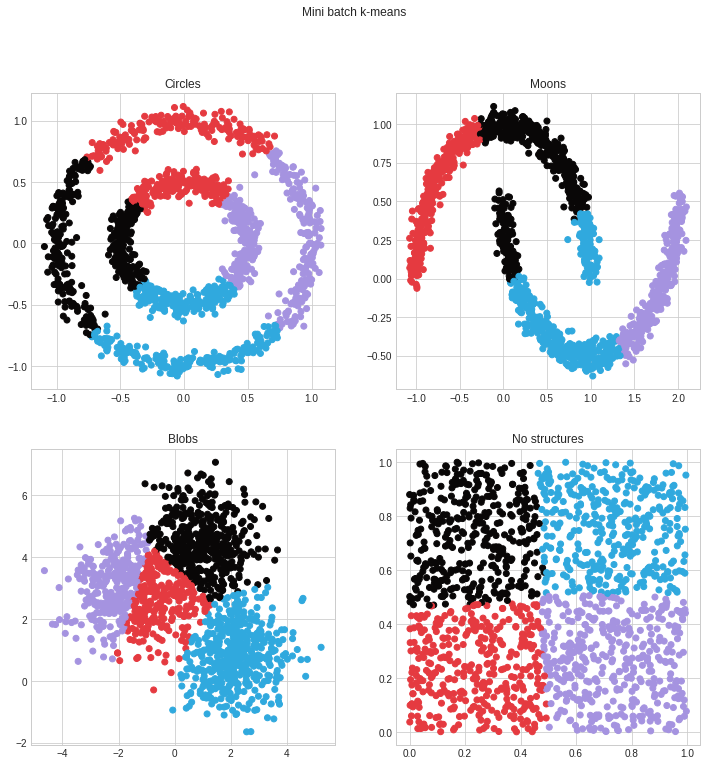

In [41]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Mini batch k-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), circles,221,'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), moons,222,'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), blobs,223,'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), no_structures,224,'No structures')

##Affinity propagation
*   샘플 쌍 끼리 메시지를 보내 군집을 생성
*   샘플을 대표하는 적절한 예를 찾을 때 까지 반복
*   군집의 갯수를 자동으로 정함 



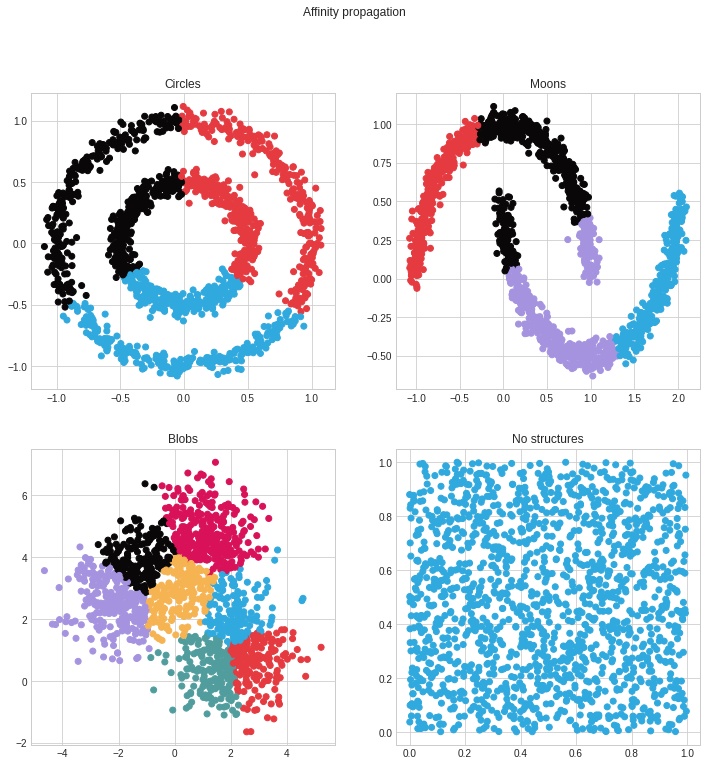

In [42]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Affinity propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), circles,221,'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), moons,222,'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), blobs,223,'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), no_structures,224,'No structures')

#Mean shift 

*   중심점 후보를 정해진 구역 내 평균으로 업데이트



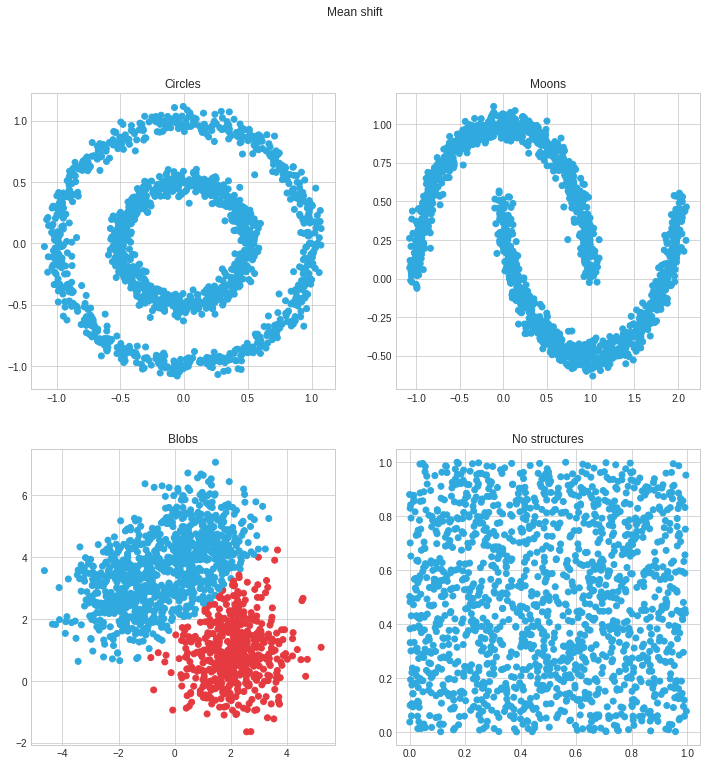

In [43]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Mean shift')

fit_predict_plot(cluster.MeanShift(), circles,221,'Circles')
fit_predict_plot(cluster.MeanShift(), moons,222,'Moons')
fit_predict_plot(cluster.MeanShift(), blobs,223,'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures,224,'No structures')

##스펙트럼 군집화 (Spectrum Clustering)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

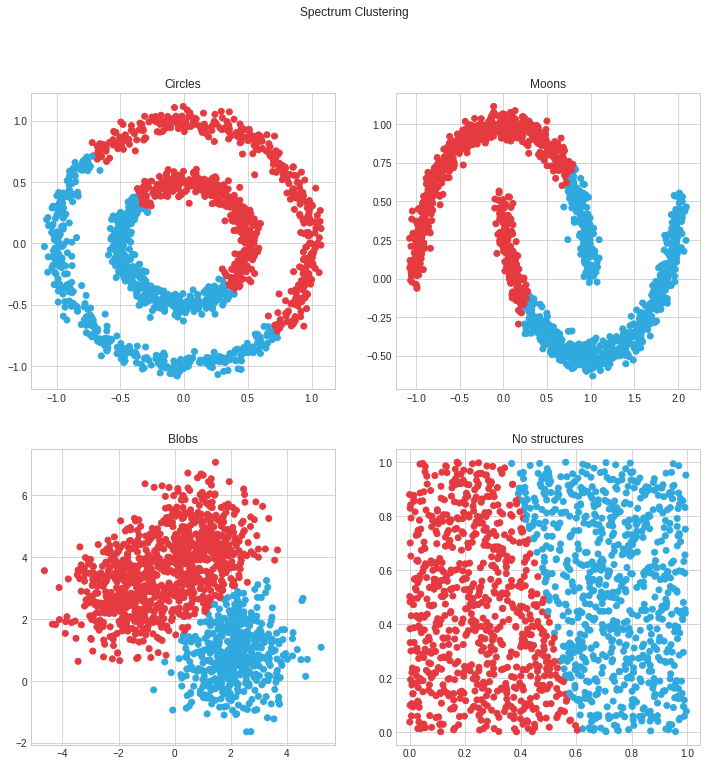

In [47]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Spectrum Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), circles,221,'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), moons,222,'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), blobs,223,'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), no_structures,224,'No structures')

##유방암 데이터 군집화

In [50]:
from sklearn.datasets import load_breast_cancer

In [51]:
cancer = load_breast_cancer()

In [54]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

In [55]:
idx=np.where(predict==0)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [56]:
idx=np.where(predict==1)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

##계층군집화 (Hierarchical clustering)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

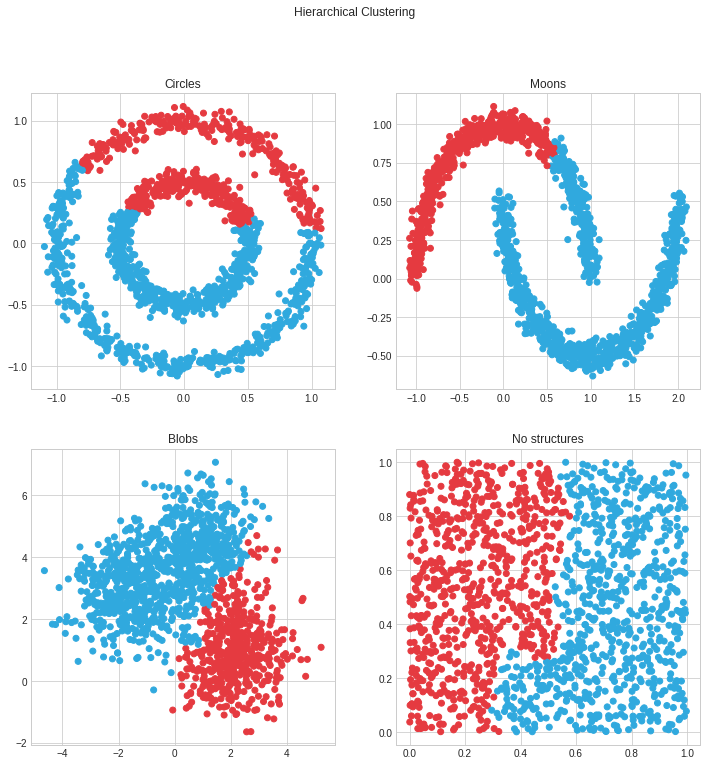

In [58]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), circles,221,'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2,  linkage='ward'), moons,222,'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2,  linkage='ward'), blobs,223,'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), no_structures,224,'No structures')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

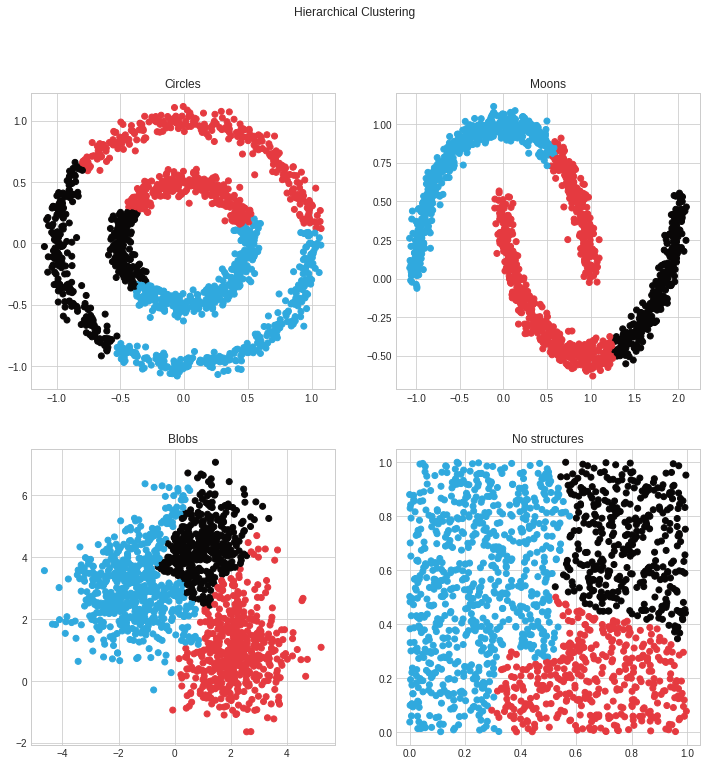

In [59]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), circles,221,'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3,  linkage='ward'), moons,222,'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3,  linkage='ward'), blobs,223,'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), no_structures,224,'No structures')

##와인 데이터 군집화 

In [60]:
from sklearn.datasets import load_wine

In [61]:
wine= load_wine()

In [63]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict=model.labels_

In [64]:
idx = np.where(predict == 0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [65]:
idx = np.where(predict == 1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [66]:
idx = np.where(predict == 2)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##DBSCAN (Density-Based Spatial Clustering of Applications with noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

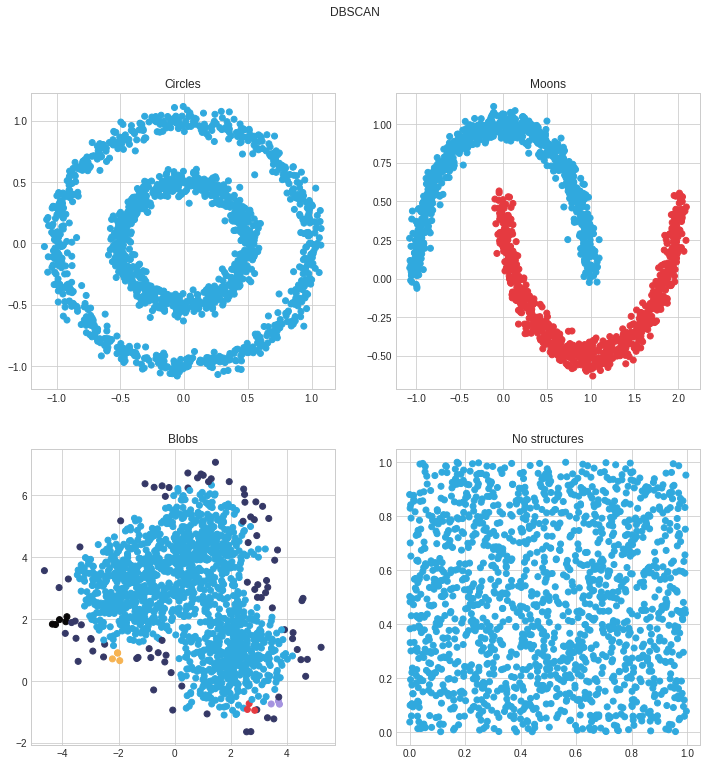

In [69]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3), circles,221,'Circles')
fit_predict_plot(cluster.DBSCAN(eps=.3), moons,222,'Moons')
fit_predict_plot(cluster.DBSCAN(eps=.3), blobs,223,'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3), no_structures,224,'No structures')




##OPTICS(Ordering Point to Identity the clustering Structure)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

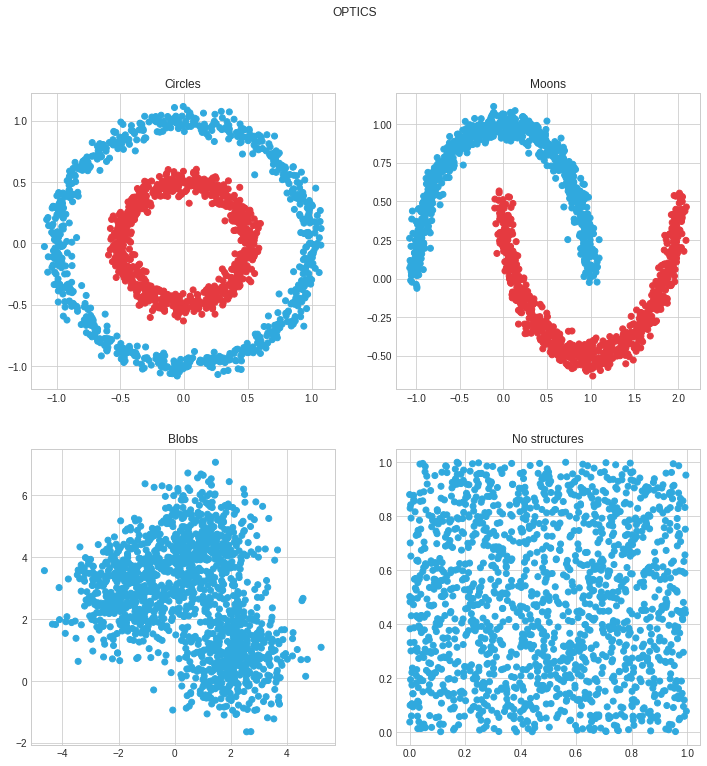

In [74]:
fig =plt.figure(figsize=(12,12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles,221,'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moons,222,'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs,223,'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures,224,'No structures')

##Birch (Balanced iterative reducing and clustering using hierarchies)